In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def input_matrix():
    rows = int(input("Enter the number of rows: "))
    cols = int(input("Enter the number of columns: "))
    
    print("Enter the augmented matrix row by row, with each element separated by space:")
    matrix = []
    for i in range(rows):
        row = list(map(float, input().split()))
        if len(row) != cols:
            print("Invalid input. Please enter exactly {} values.".format(cols))
            return None
        matrix.append(row)
        
    return np.array(matrix)

In [3]:
def solve_homogeneous(A):
    U, s, Vh = np.linalg.svd(A)
    null_space = Vh[s.size:].T
    return null_space

In [4]:
def solve_nonhomogeneous(A, b):
    try:
        solution = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        solution = "No unique solution exists"
    return solution

In [5]:
def plot_solution_homogeneous(solution):
    if solution.shape[1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot the plane
        x = np.linspace(-10, 10, 400)
        y = np.linspace(-10, 10, 400)
        X, Y = np.meshgrid(x, y)
        Z = (-solution[0] * X - solution[1] * Y) / solution[2]
        
        ax.plot_surface(X, Y, Z, alpha=0.5)
        plt.title("Solution to Homogeneous System")
        plt.show()


In [6]:
def plot_solution_nonhomogeneous(solution):
    if isinstance(solution, str):
        print(solution)
    elif solution.shape[0] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot the point
        ax.scatter(solution[0], solution[1], solution[2], c='r', marker='o')
        plt.title("Solution to Nonhomogeneous System")
        plt.show()

Enter the number of rows:  3
Enter the number of columns:  4


Enter the augmented matrix row by row, with each element separated by space:


 1 1 1 0
 1 -1 0 0
 0 1 -1 0


Solving A*x = 0
Homogeneous solution: 
 []
Solving A*x = b
Nonhomogeneous solution: 
 [ 0. -0. -0.]


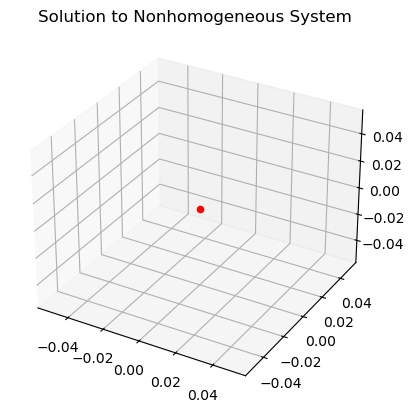

In [7]:
def main():
    augmented_matrix = input_matrix()
    if augmented_matrix is None:
        return
    
    A = augmented_matrix[:, :-1]
    b = augmented_matrix[:, -1]
    
    print("Solving A*x = 0")
    homogeneous_solution = solve_homogeneous(A)
    print("Homogeneous solution: \n", homogeneous_solution)
    plot_solution_homogeneous(homogeneous_solution)
    
    print("Solving A*x = b")
    nonhomogeneous_solution = solve_nonhomogeneous(A, b)
    print("Nonhomogeneous solution: \n", nonhomogeneous_solution)
    plot_solution_nonhomogeneous(nonhomogeneous_solution)

if __name__ == "__main__":
    main()